In [88]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tqdm import tqdm_notebook as tqdm
from keras.models import Model
from keras.layers import Input, Reshape
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling1D, Conv1D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard
from sklearn import preprocessing

In [9]:
ls

index.html       KDDTest+.txt              KDDTrain+.csv
KDDTest1.jpg     KDDTrain1.jpg             KDDTrain+.txt
KDDTest-21.arff  KDDTrain+_20Percent.arff  nsl-kdd.ipynb
KDDTest-21.txt   KDDTrain+_20Percent.txt   Untitled.ipynb
KDDTest+.arff    KDDTrain+.arff


In [100]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","labels","difficulty_level"]
train_data = pd.read_csv("KDDTrain+.txt", index_col = False,header = None,sep=",")
train_data.columns = col_names
print(train_data.shape)
train_data.head()

(125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [101]:
test_data = pd.read_csv("KDDTest+.txt", index_col = False,header = None,sep=",")
test_data.columns = col_names
print(test_data.shape)
test_data.head()

(22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


# Preprocessing

In [102]:
train_data = train_data[['duration','protocol_type','src_bytes','dst_bytes','count','srv_count','labels']] 
test_data = test_data[['duration','protocol_type','src_bytes','dst_bytes','count','srv_count','labels']]

In [103]:
r0=(float(train_data.shape[0]))
print('Dataframe dimensions:', train_data.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(train_data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(train_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(train_data.isnull().sum()/train_data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (125973, 7)


,duration,protocol_type,src_bytes,dst_bytes,count,srv_count,labels
column type,int64,object,int64,int64,int64,int64,object
null values (nb),0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0


In [104]:
r0=(float(test_data.shape[0]))
print('Dataframe dimensions:', test_data.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(test_data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(test_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(test_data.isnull().sum()/test_data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (22544, 7)


,duration,protocol_type,src_bytes,dst_bytes,count,srv_count,labels
column type,int64,object,int64,int64,int64,int64,object
null values (nb),0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0


In [105]:
train_data.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

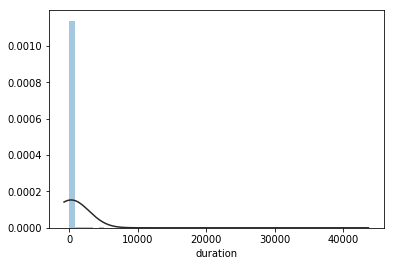

In [106]:
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

sns.distplot(train_data.duration,fit=norm, kde=False)

# Feature Selection

In [107]:
X_train = train_data[['duration','protocol_type','src_bytes','dst_bytes','count','srv_count']] 
y_train = train_data['labels']
X_test = test_data[['duration','protocol_type','src_bytes','dst_bytes','count','srv_count']] 
y_test = test_data['labels']
X_train.head()

,duration,protocol_type,src_bytes,dst_bytes,count,srv_count
0,0,tcp,491,0,2,2
1,0,udp,146,0,13,1
2,0,tcp,0,0,123,6
3,0,tcp,232,8153,5,5
4,0,tcp,199,420,30,32


In [108]:
X_train = pd.concat([X_train,pd.get_dummies(X_train.protocol_type)],axis=1).drop(['protocol_type'],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test.protocol_type)],axis=1).drop(['protocol_type'],axis=1)

In [128]:
le = preprocessing.LabelEncoder()
y_train_num = le.fit_transform(np.where(y_train=='normal', 'normal', 'abnomal'))

In [133]:
y_train_num.shape

(125973, 2)

In [132]:
y_train_num = keras.utils.to_categorical(y_train_num, 2)

In [91]:
y_test = le.fit_transform(y_test)

In [77]:
y_test.shape

(22544,)

In [65]:
X_train.shape

(125973, 8)

In [73]:
def get_generative(G_in, dense_dim=200, out_dim=8, lr=1e-3):
    x = Dense(dense_dim)(G_in)
    x = Activation('tanh')(x)
    G_out = Dense(out_dim, activation='tanh')(x)
    G = Model(G_in, G_out)
    opt = SGD(lr=lr)
    G.compile(loss='binary_crossentropy', optimizer=opt)
    return G, G_out

G_in = Input(shape=[8])
G, G_out = get_generative(G_in)
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               1800      
_________________________________________________________________
activation_3 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 1608      
Total params: 3,408
Trainable params: 3,408
Non-trainable params: 0
_________________________________________________________________


In [74]:
def get_discriminative(D_in, lr=1e-3, drate=.25, n_channels=8, conv_sz=5, leak=.2):
    x = Reshape((-1, 1))(D_in)
    x = Conv1D(n_channels, conv_sz, activation='relu')(x)
    x = Dropout(drate)(x)
    x = Flatten()(x)
    x = Dense(n_channels)(x)
    D_out = Dense(2, activation='sigmoid')(x)
    D = Model(D_in, D_out)
    dopt = Adam(lr=lr)
    D.compile(loss='binary_crossentropy', optimizer=dopt)
    return D, D_out

D_in = Input(shape=[8])
D, D_out = get_discriminative(D_in)
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 8, 1)              0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 8)              48        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 8)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 18        
Total para

In [75]:
def set_trainability(model, trainable=False):
    model.trainable = trainable
    for layer in model.layers:
        layer.trainable = trainable
        
def make_gan(GAN_in, G, D):
    set_trainability(D, False)
    x = G(GAN_in)
    GAN_out = D(x)
    GAN = Model(GAN_in, GAN_out)
    GAN.compile(loss='binary_crossentropy', optimizer=G.optimizer)
    return GAN, GAN_out

GAN_in = Input([8])
GAN, GAN_out = make_gan(GAN_in, G, D)
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
model_5 (Model)              (None, 8)                 3408      
_________________________________________________________________
model_6 (Model)              (None, 2)                 330       
Total params: 3,738
Trainable params: 3,408
Non-trainable params: 330
_________________________________________________________________


In [134]:
def pretrain(G, D, noise_dim=10, n_samples=10000, batch_size=32):
    set_trainability(D, True)
    D.fit(X_train, y_train_num, epochs=1, batch_size=batch_size)

pretrain(G, D)

Epoch 1/1
125973/125973 [==============================] - 24s 193us/step - loss: 0.6184


In [135]:
X_train.shape

(125973, 8)

In [147]:
def sample_noise(G, noise_dim=8, n_samples=125973):
    X_train = np.random.uniform(0, 1, size=[n_samples, noise_dim])
    y_train_num = np.zeros((n_samples, 2))
    y_train_num[:, 1] = 1
    return X_train, y_train_num

def train(GAN, G, D, epochs=500, n_samples=125973, noise_dim=8, batch_size=32, verbose=False, v_freq=50):
    global X_train, y_train_num
    d_loss = []
    g_loss = []
    e_range = range(epochs)
    if verbose:
        e_range = tqdm(e_range)
    for epoch in e_range:
        set_trainability(D, True)
        d_loss.append(D.train_on_batch(X_train, y_train_num))

        X_train, y_train_num = sample_noise(G, n_samples = n_samples, noise_dim = noise_dim)
        set_trainability(D, False)
        g_loss.append(GAN.train_on_batch(X_train, y_train_num))
        if verbose and (epoch + 1) % v_freq == 0:
            print("Epoch #{}: Generative Loss: {}, Discriminative Loss: {}".format(epoch + 1, g_loss[-1], d_loss[-1]))
    return d_loss, g_loss

d_loss, g_loss = train(GAN, G, D, verbose=True)

Epoch #50: Generative Loss: 0.3834693431854248, Discriminative Loss: 0.34508201479911804
Epoch #100: Generative Loss: 0.20444141328334808, Discriminative Loss: 0.19097842276096344
Epoch #150: Generative Loss: 0.1272864192724228, Discriminative Loss: 0.12131381034851074
Epoch #200: Generative Loss: 0.08706416189670563, Discriminative Loss: 0.08420436829328537
Epoch #250: Generative Loss: 0.06351950019598007, Discriminative Loss: 0.06226980686187744
Epoch #300: Generative Loss: 0.04872225224971771, Discriminative Loss: 0.0485043078660965
Epoch #350: Generative Loss: 0.03887607529759407, Discriminative Loss: 0.039037611335515976
Epoch #400: Generative Loss: 0.03178347274661064, Discriminative Loss: 0.03253255784511566
Epoch #450: Generative Loss: 0.02664296142756939, Discriminative Loss: 0.02788054198026657
Epoch #500: Generative Loss: 0.022724699229002, Discriminative Loss: 0.0239604152739048


Text(0, 0.5, 'Loss')

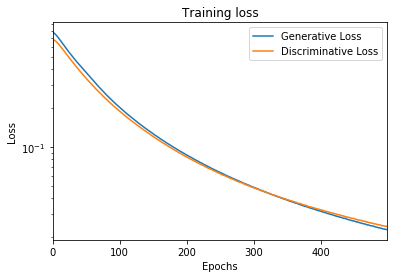

In [148]:
ax = pd.DataFrame(
    {
        'Generative Loss': g_loss,
        'Discriminative Loss': d_loss,
    }
).plot(title='Training loss', logy=True)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

In [149]:
N_VIEWED_SAMPLES = 2
data_and_gen, _ = sample_data_and_gen(G, n_samples=N_VIEWED_SAMPLES)
pd.DataFrame(np.transpose(data_and_gen[N_VIEWED_SAMPLES:])).plot()

NameError: name 'sample_data_and_gen' is not defined